In [1]:
# Ensure reproducibility
import os
print(os.environ.get("CUBLAS_WORKSPACE_CONFIG")) # Default is None
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"
print(os.environ.get("CUBLAS_WORKSPACE_CONFIG"))

None
:4096:8


In [2]:
import json
import torch
import h5py
import torch.nn as nn

from torch import optim
from pprint import pprint
from utils.plant_seed import plant_seed
from torch.utils.data import DataLoader
from utils.optimizer import CosineScheduler
from utils.dataset import FullySupervisedDataset
from sklearn.model_selection import train_test_split
from utils.dataset import extract_parameters_from_datatype, check_indices_overlap
from utils.load_model import load_create_classification_model
from utils.load_data import get_fully_supervised_pretrain_indices
from utils.train_model import train_fully_supervised_pretrain_model, eval_best_model, eval_last_model


seed = 0
seed_worker, g = plant_seed(seed)

In [3]:
label_map = {
    0: "BROWSE",
    1: "PLAY",
    2: "READ",
    3: "SEARCH",
    4: "WATCH",
    5: "WRITE"
}

In [4]:
config_file_path = "utils/DesktopActivity_config.json"
with open(config_file_path, "r") as file:
    config = json.load(file)
pprint(config)

{'V1Conv': {'dilation': 1, 'kernel_size': 30, 'padding': 1, 'stride': 15},
 'V2Conv': {'dilation': 1, 'kernel_size': 40, 'padding': 1, 'stride': 20},
 'V3Conv': {'dilation': 1, 'kernel_size': 20, 'padding': 1, 'stride': 10},
 'data_path': 'dataset/training_data/DesktopActivity_Standardized',
 'data_type': 'overlap_0.0_window_15s',
 'finetune_base_lr': 0.001,
 'finetune_batch_size': 64,
 'finetune_epoch': 100,
 'finetune_final_lr': 0.001,
 'finetune_max_update_epochs': 80,
 'finetune_proportion': 0.8,
 'finetune_warmup_epochs': 10,
 'kdd_model': {'conv_config': None,
               'd_model': 128,
               'dim_feedforward': 256,
               'emb_dropout': 0.1,
               'embedding': 'linear',
               'enc_dropout': 0.1,
               'feat_dim': 2,
               'max_seq_len': None,
               'n_heads': 16,
               'n_layers': 1},
 'label_smoothing': 0.1,
 'pretrain_base_lr': 0.001,
 'pretrain_batch_size': 32,
 'pretrain_epoch': 151,
 'pretrain_final_

In [5]:
overlap, window_seconds, window_length = extract_parameters_from_datatype(config['data_type'])
print(f"overlap {overlap}, window seconds: {window_seconds}, window length: {window_length}")

# assign the window length to the config
config['kdd_model']['max_seq_len'] = window_length

overlap 0.0, window seconds: 15, window length: 450


In [6]:
subjects_dict_path = os.path.join(config['data_path'], config['data_type'], 'starting_indices.json')
with open(subjects_dict_path, "r") as file:
    subjects = json.load(file)
pprint(subjects)

data_file_path = os.path.join(config['data_path'], config['data_type'], f"{config['data_type']}.h5")
with h5py.File(data_file_path, 'r') as h5_file:
    last_index = h5_file['training_data'].shape[0] - 1
    # print(last_index)

{'P01': 0,
 'P02': 119,
 'P03': 239,
 'P04': 359,
 'P05': 479,
 'P06': 599,
 'P07': 719,
 'P08': 839}


Leave out subject: P01
No overlap between train and validation indices.
No overlap between train and test indices.
No overlap between validation and test indices.
No overlap detected between datasets.
{'conv_config': None,
 'd_model': 128,
 'dim_feedforward': 256,
 'emb_dropout': 0.1,
 'embedding': 'linear',
 'enc_dropout': 0.1,
 'feat_dim': 2,
 'max_len': 450,
 'n_heads': 16,
 'n_layers': 1,
 'num_classes': 6}
Linear embedding: 450 sequence length.
=====================Training via cuda===================
Run cmd: tensorboard --logdir=results/DesktopActivity/overlap_0.0_window_15s/fully_supervised/feat_dim_2_d_model_128_n_heads_16_n_layers_1_d_ff_256_emb_dropout_0.1_enc_dropout_0.1_embedding_linear_conv_config_None/epochs_151_max_update_steps_151_warmup_steps_15_batch_size_32_base_lr_0.001_final_lr_0.001_label_smoothing_0.1/P01_leave_out/TensorBoard_Log then open http://localhost:6006
Leave out subject: P02
No overlap between train and validation indices.
No overlap between train and 

/home/tony/Desktop/new_summer_research/utils/train_model.py:200: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 4))


Leave out subject: P07
No overlap between train and validation indices.
No overlap between train and test indices.
No overlap between validation and test indices.
No overlap detected between datasets.
{'conv_config': None,
 'd_model': 128,
 'dim_feedforward': 256,
 'emb_dropout': 0.1,
 'embedding': 'linear',
 'enc_dropout': 0.1,
 'feat_dim': 2,
 'max_len': 450,
 'n_heads': 16,
 'n_layers': 1,
 'num_classes': 6}
Linear embedding: 450 sequence length.
=====================Training via cuda===================
Run cmd: tensorboard --logdir=results/DesktopActivity/overlap_0.0_window_15s/fully_supervised/feat_dim_2_d_model_128_n_heads_16_n_layers_1_d_ff_256_emb_dropout_0.1_enc_dropout_0.1_embedding_linear_conv_config_None/epochs_151_max_update_steps_151_warmup_steps_15_batch_size_32_base_lr_0.001_final_lr_0.001_label_smoothing_0.1/P07_leave_out/TensorBoard_Log then open http://localhost:6006
Leave out subject: P08
No overlap between train and validation indices.
No overlap between train and 

<Figure size 1200x400 with 0 Axes>

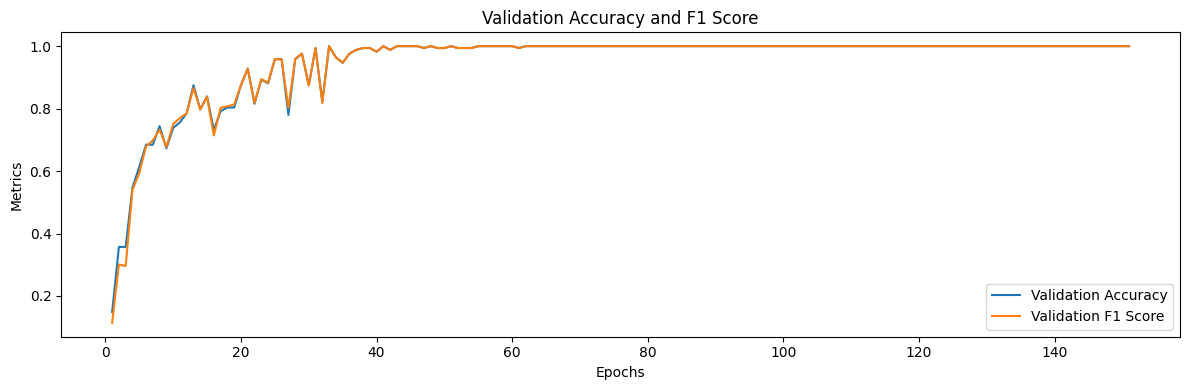

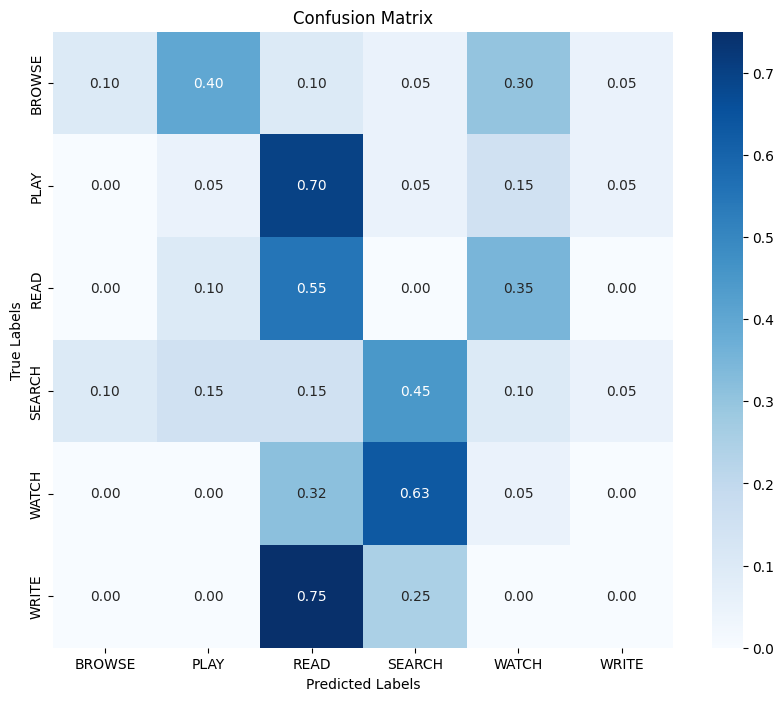

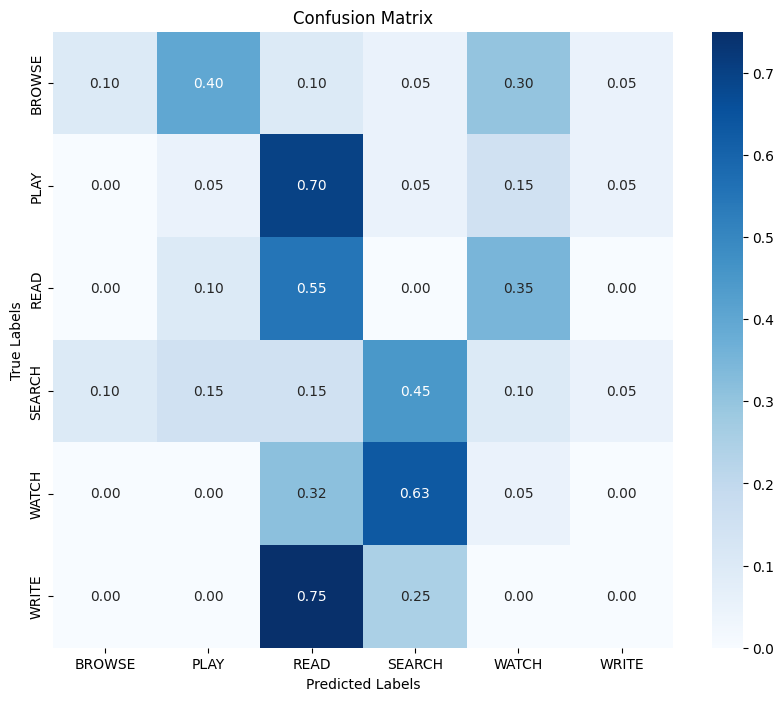

<Figure size 1200x400 with 0 Axes>

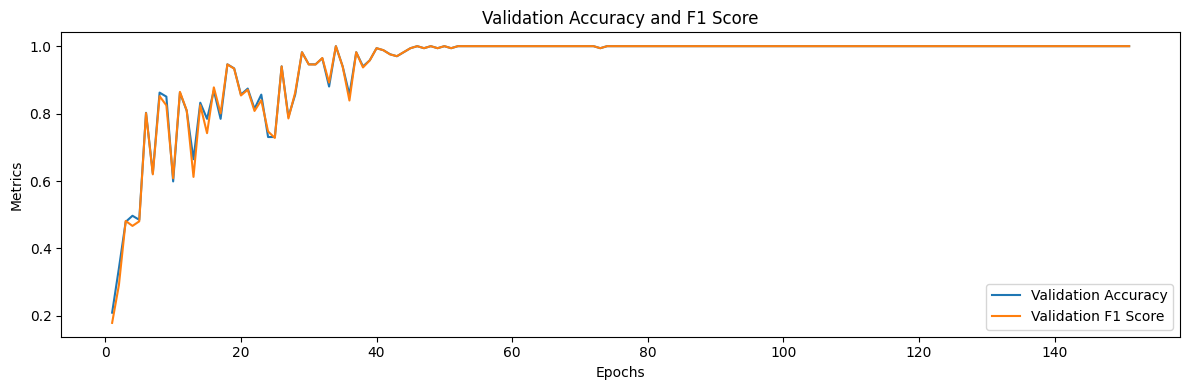

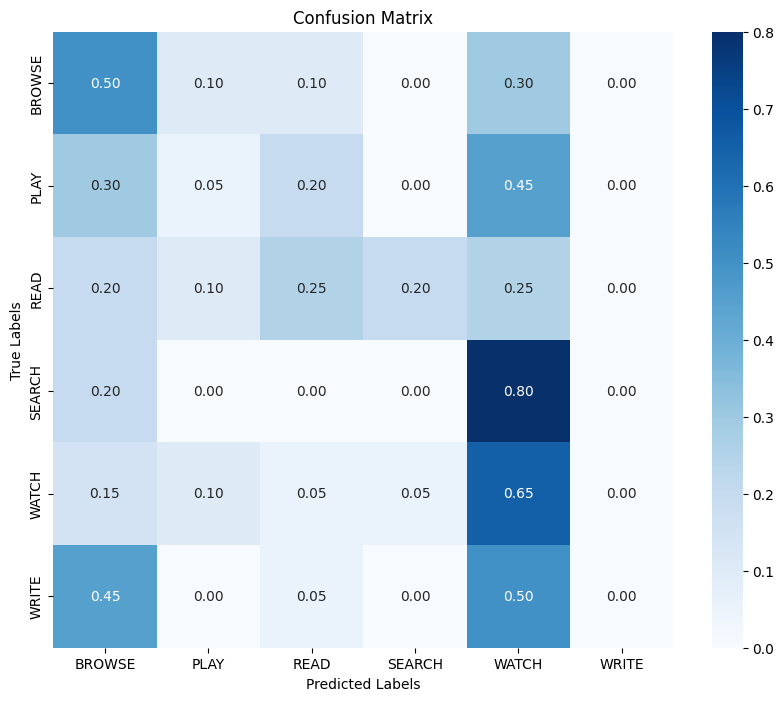

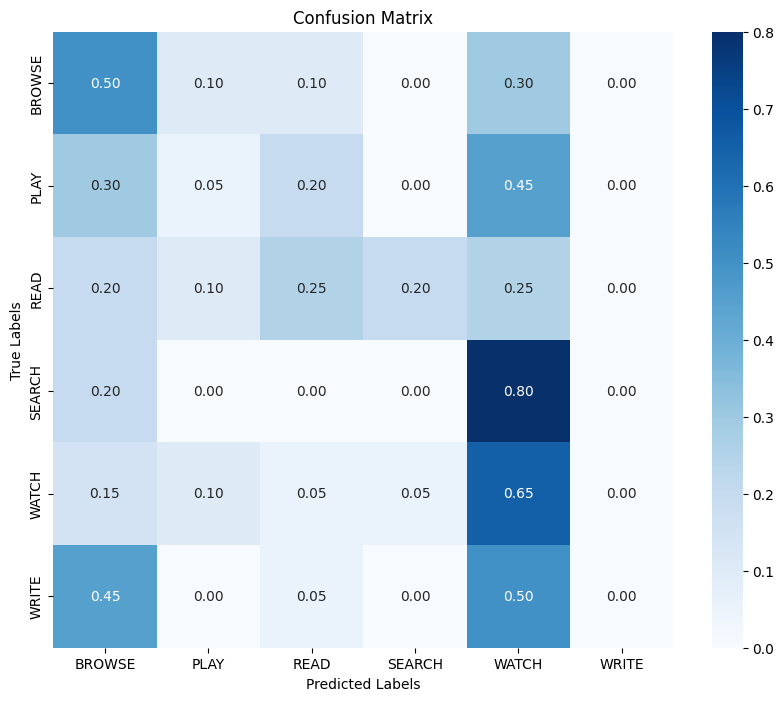

<Figure size 1200x400 with 0 Axes>

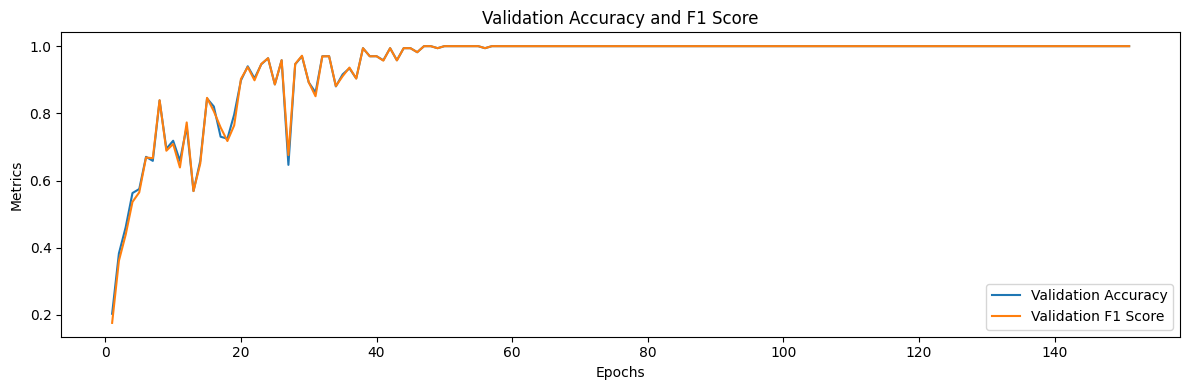

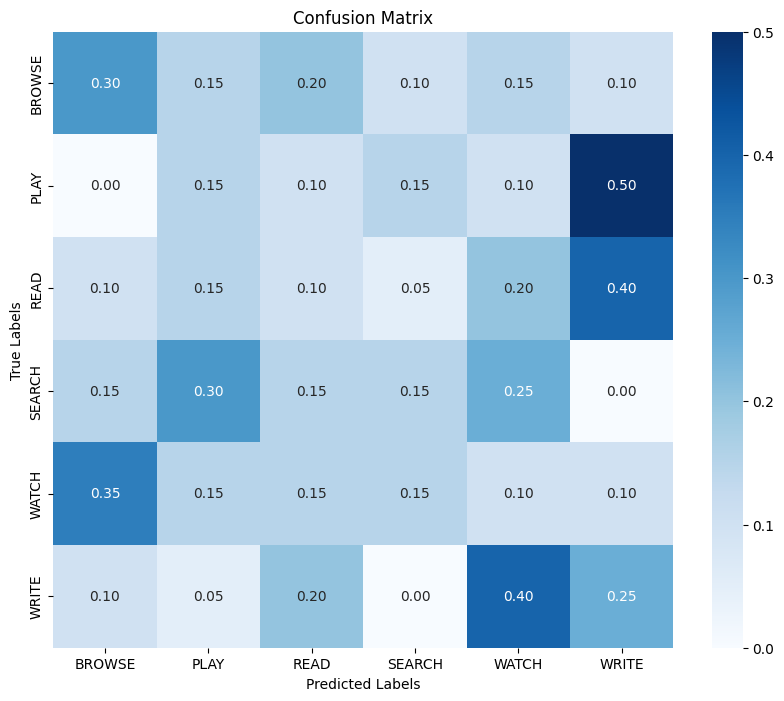

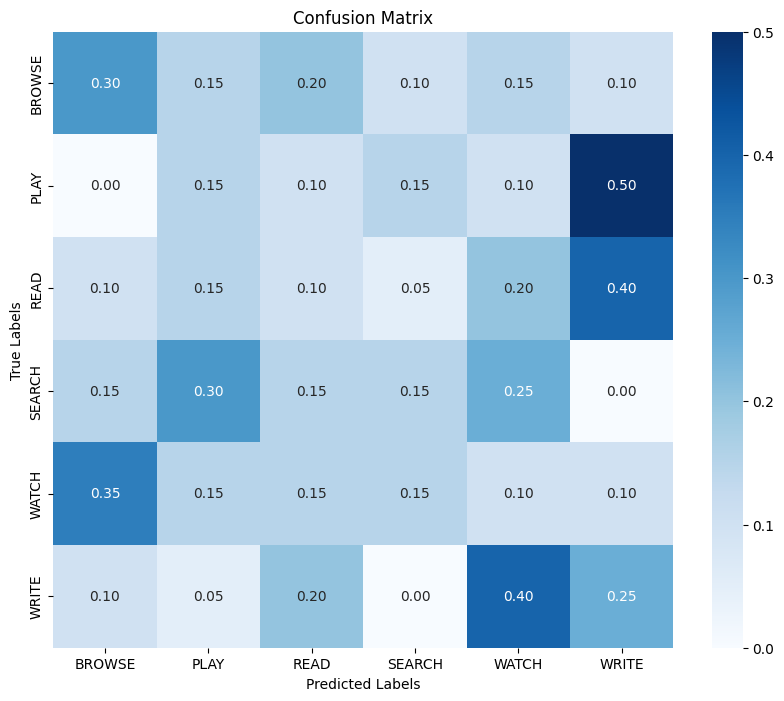

<Figure size 1200x400 with 0 Axes>

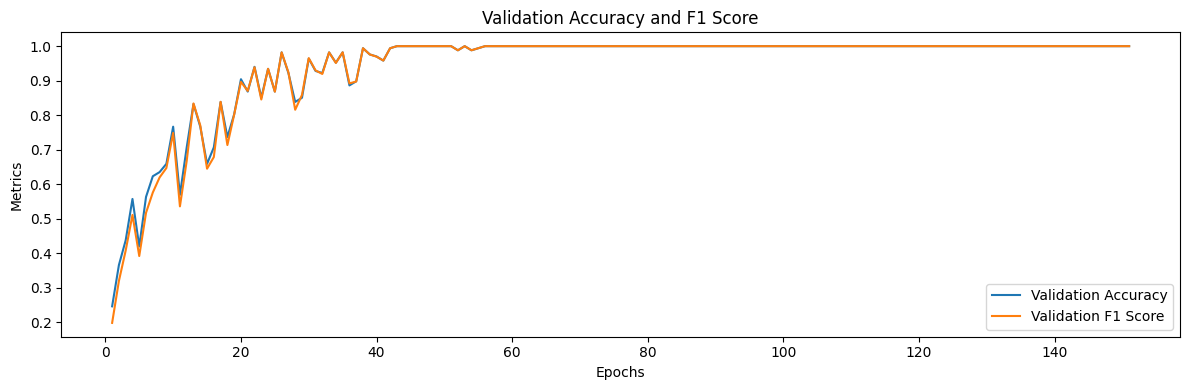

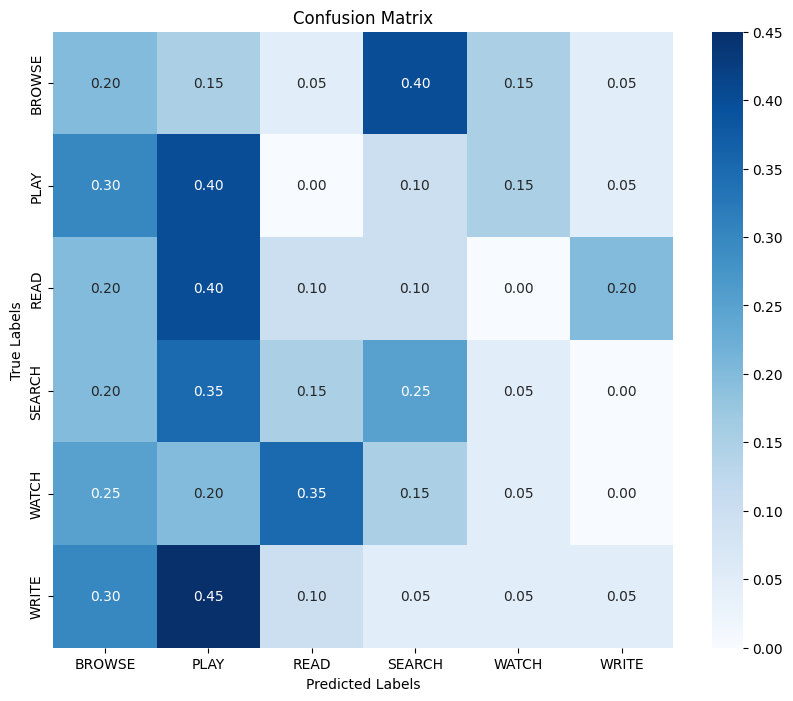

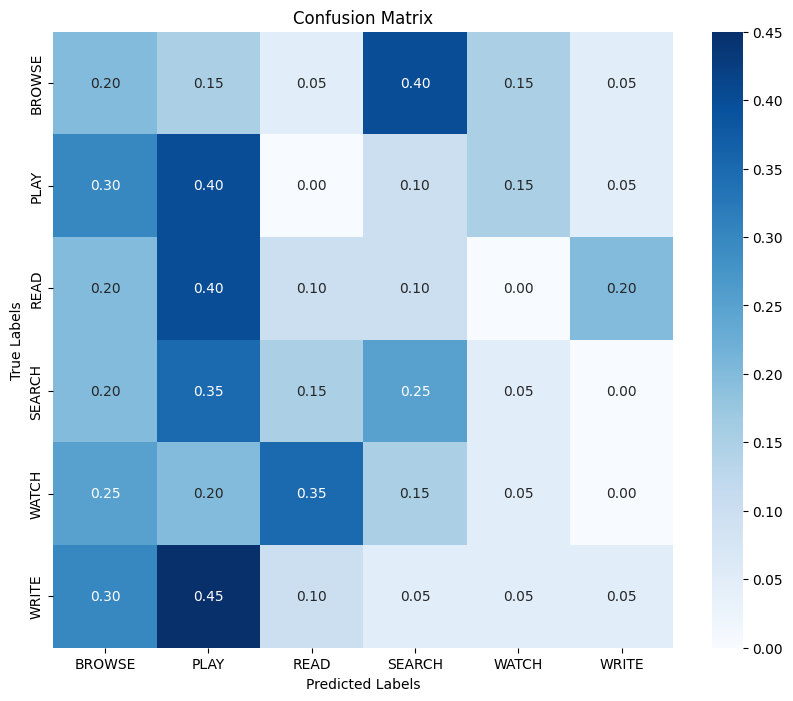

<Figure size 1200x400 with 0 Axes>

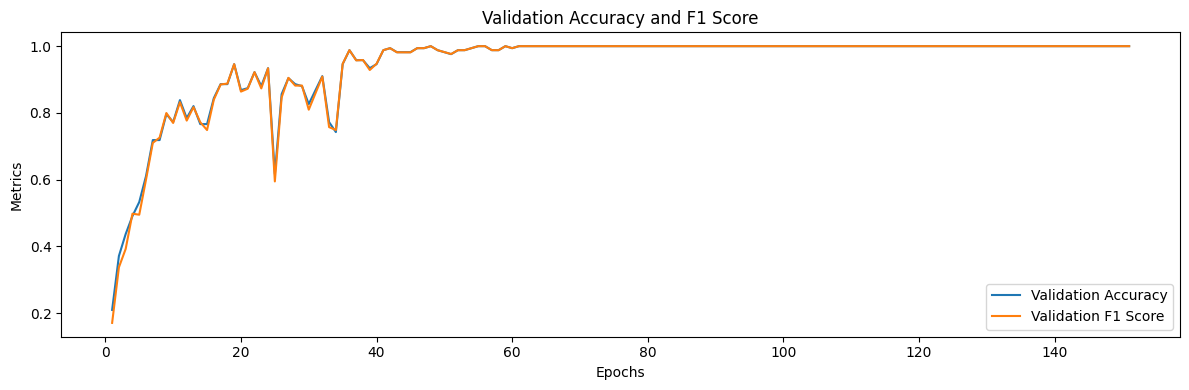

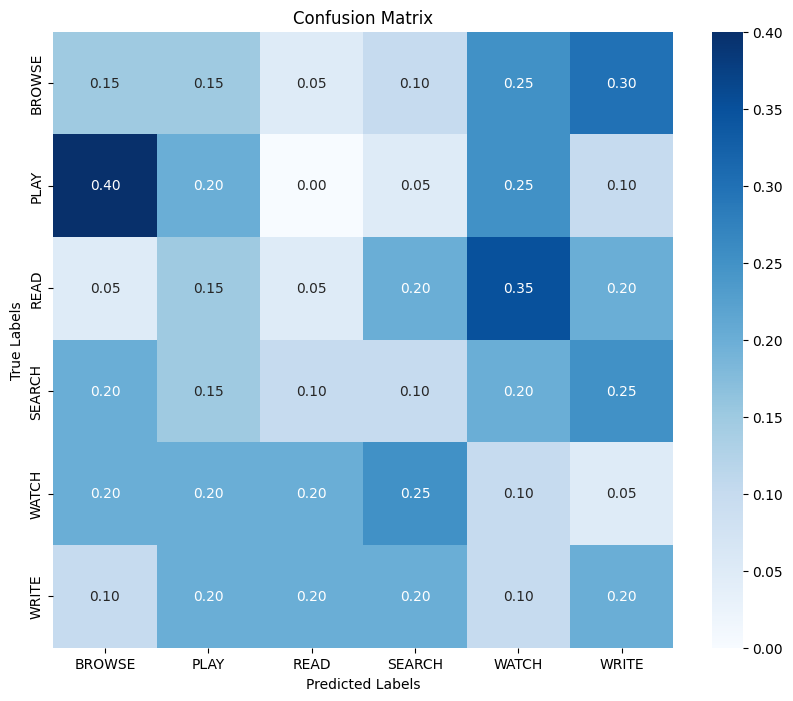

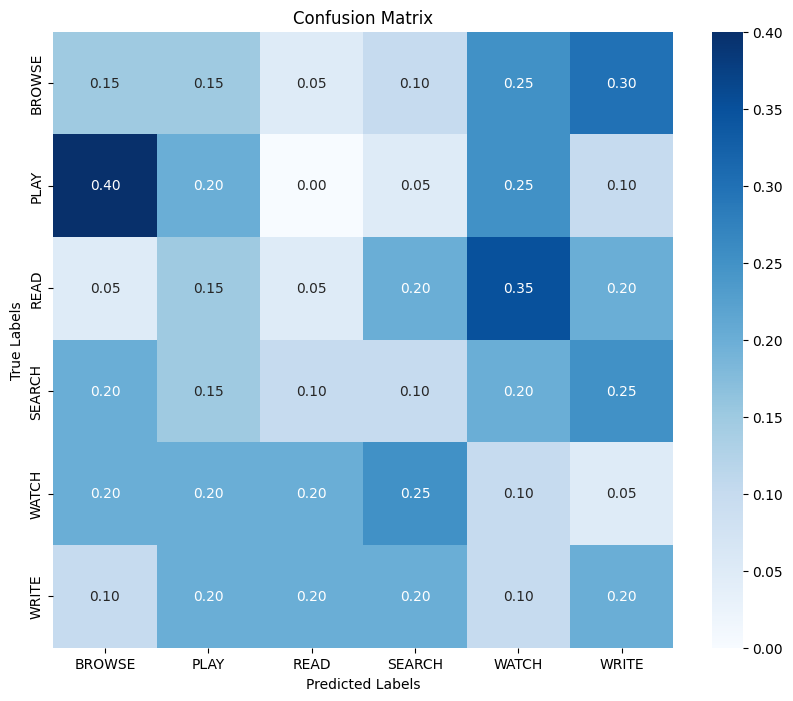

<Figure size 1200x400 with 0 Axes>

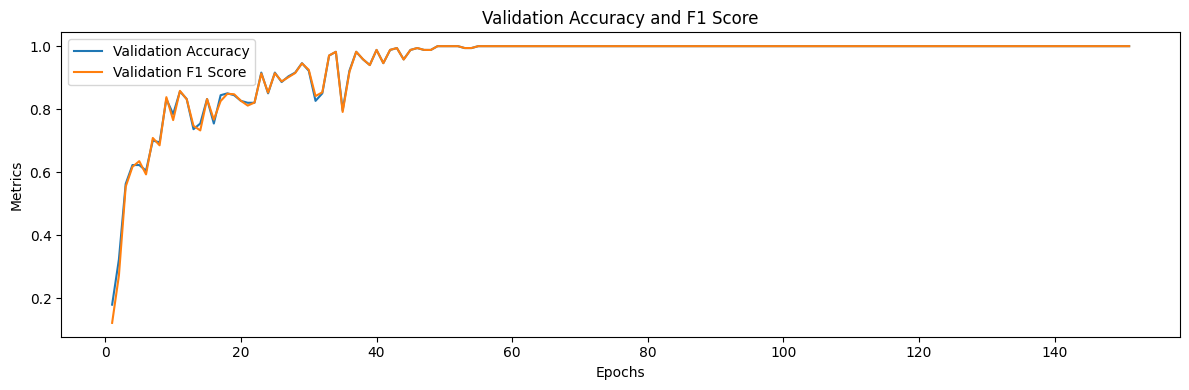

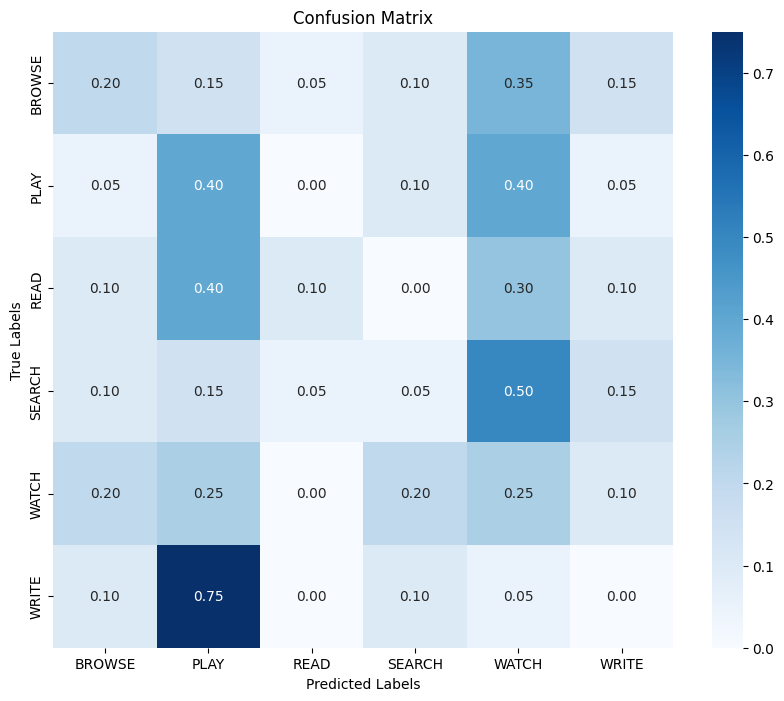

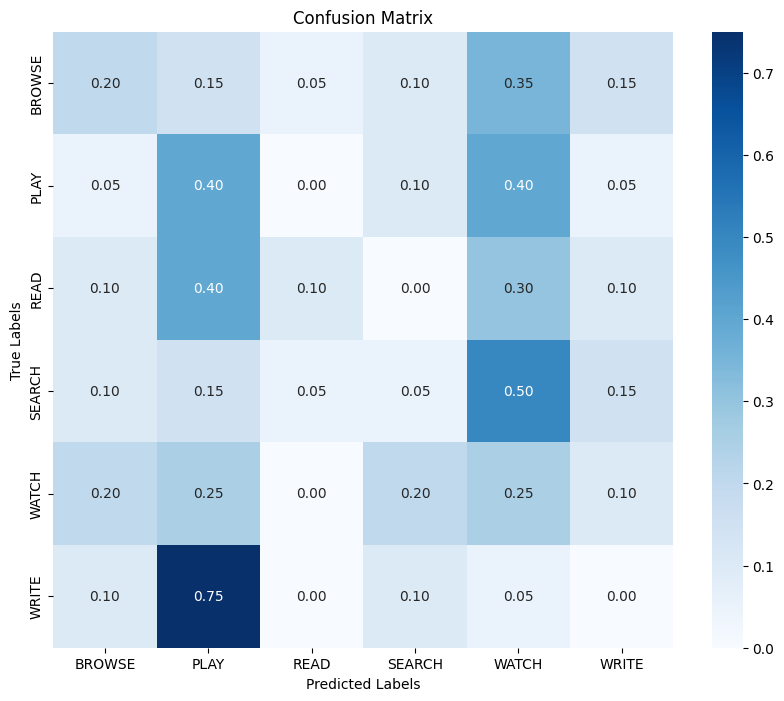

<Figure size 1200x400 with 0 Axes>

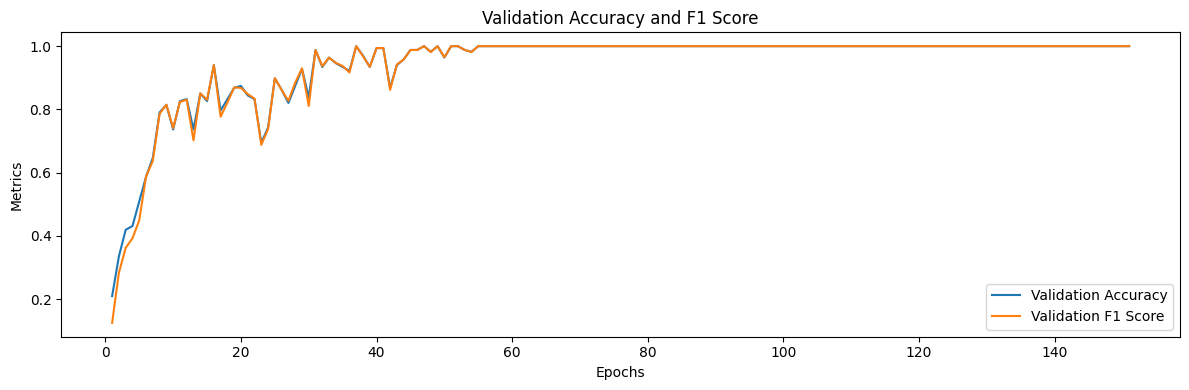

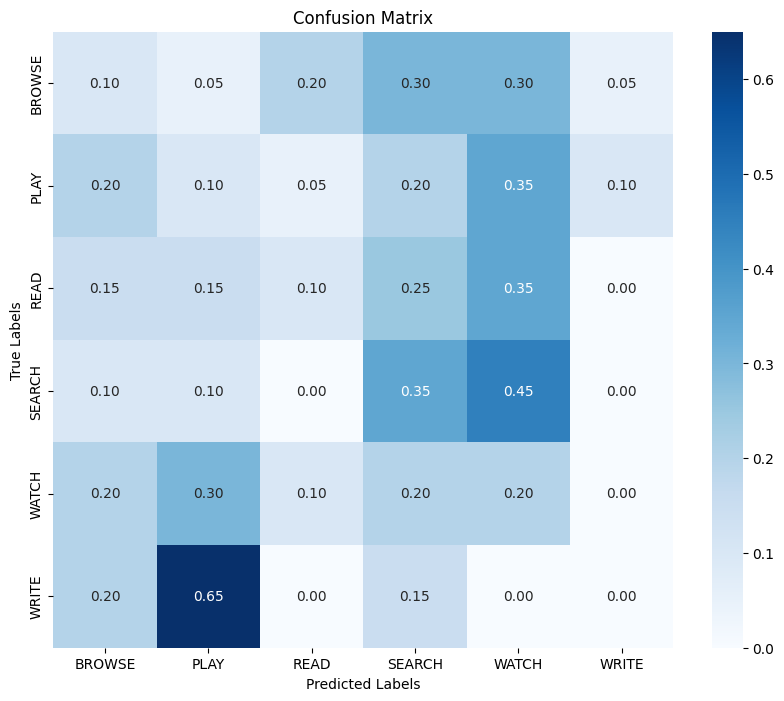

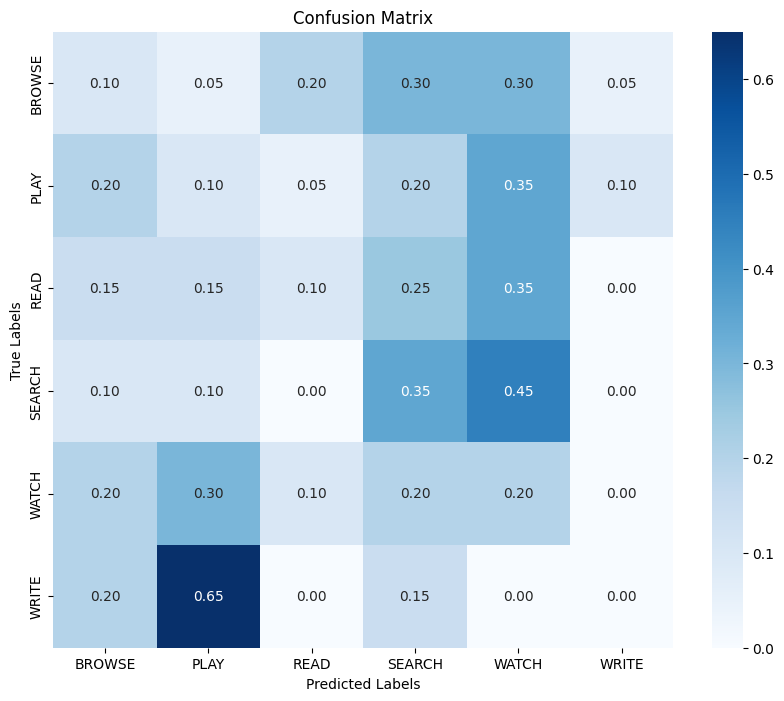

<Figure size 1200x400 with 0 Axes>

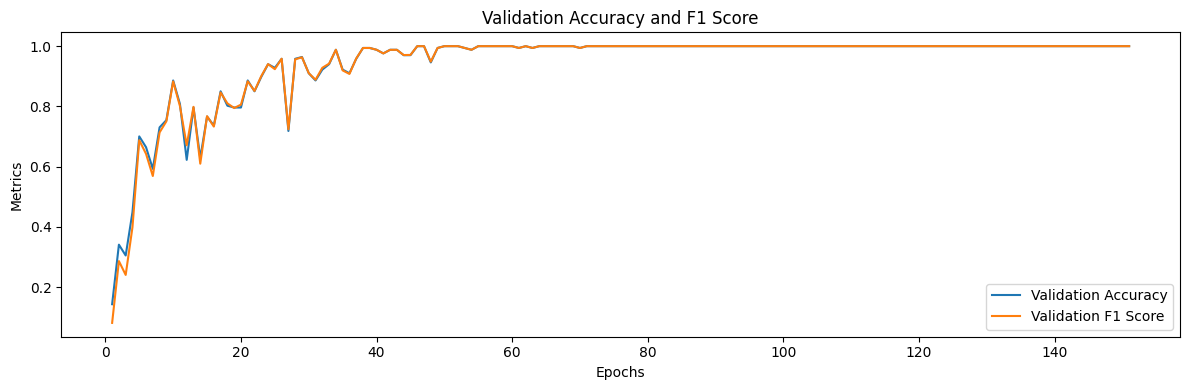

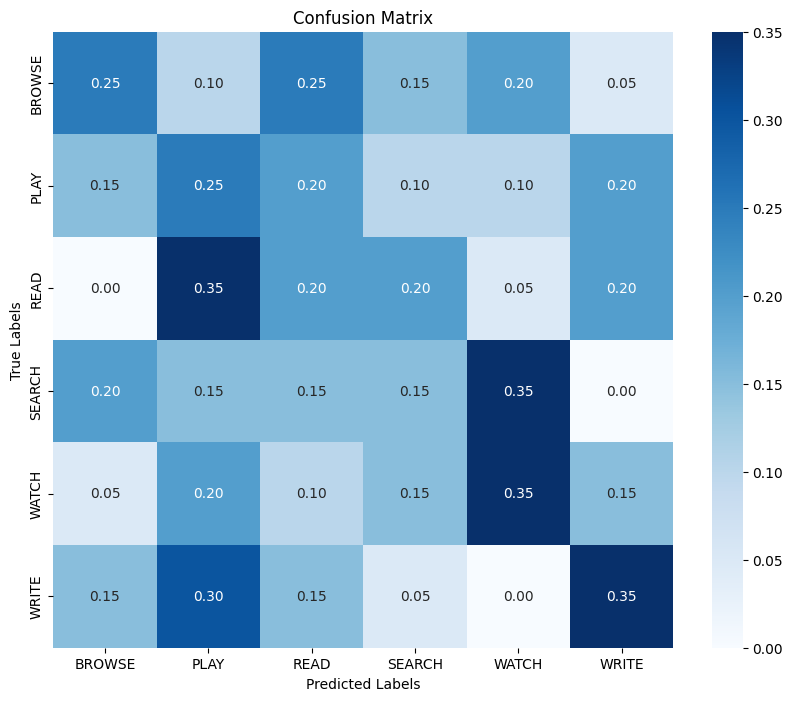

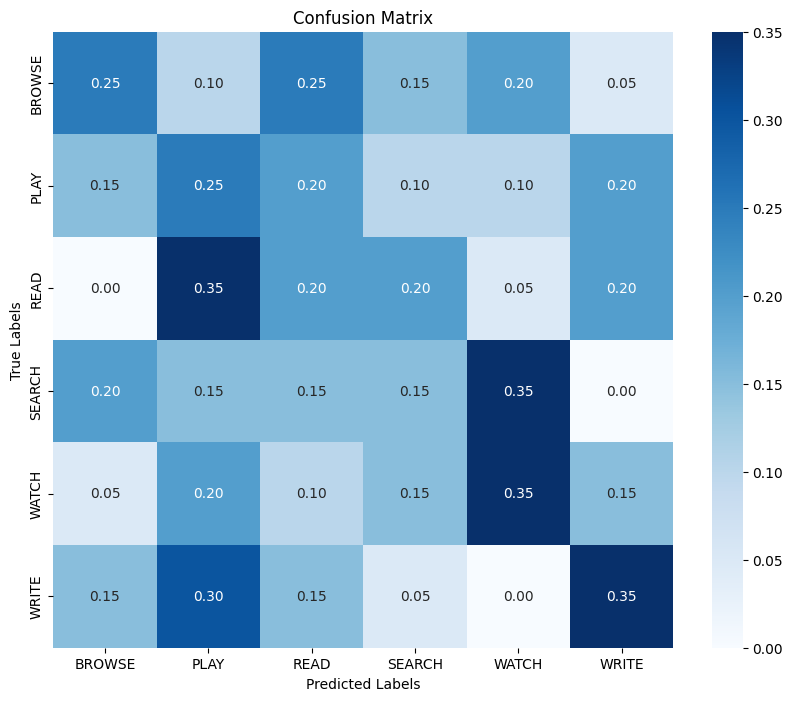

In [7]:
# Pretrain Loop
total_acc = 0
total_f1 = 0
for leave_out_subject in subjects:
    print(f"Leave out subject: {leave_out_subject}")
    pretrain_test_indices, pretrain_train_indices = get_fully_supervised_pretrain_indices(subjects, leave_out_subject, last_index)
    # split train indices into train and validation
    pretrain_train_indices, pretrain_val_indices = train_test_split(pretrain_train_indices, test_size=config['pretrain_proportion'], random_state=seed)
    
    overlap_check = check_indices_overlap(pretrain_train_indices, pretrain_val_indices, pretrain_test_indices)
    if not overlap_check:
        print("Warning: Overlap detected between datasets. Please review the index splitting process.")
    else:
        print("No overlap detected between datasets.")
    
    train_dataset = FullySupervisedDataset(data_file_path, pretrain_train_indices, label_map)
    val_dataset = FullySupervisedDataset(data_file_path, pretrain_val_indices, label_map)
    test_dataset = FullySupervisedDataset(data_file_path, pretrain_test_indices, label_map)
    
    train_loader = DataLoader(train_dataset, batch_size=config['pretrain_batch_size'], shuffle=True, num_workers=0, worker_init_fn=seed_worker, generator=g) 
    val_loader = DataLoader(train_dataset, batch_size=config['pretrain_batch_size'], shuffle=False, num_workers=0, worker_init_fn=seed_worker, generator=g)
    test_loader = DataLoader(test_dataset, batch_size=config['pretrain_batch_size'], shuffle=False, num_workers=0, worker_init_fn=seed_worker, generator=g)
    
    loaders = (train_loader, val_loader, test_loader)
    
    model, model_config = load_create_classification_model(config, num_classes=len(label_map))
    
    criterion = nn.CrossEntropyLoss(label_smoothing=config['label_smoothing'])
    optimizer = optim.Adam(model.parameters(), lr=1.0, betas=(0.9, 0.999))
    scheduler = CosineScheduler(max_update=config['pretrain_max_update_epochs'], base_lr=config['pretrain_base_lr'], final_lr=config['pretrain_final_lr'], warmup_steps=config['pretrain_warmup_epochs'], warmup_begin_lr=0.0)
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=scheduler)
    
    tensorboard_writer = train_fully_supervised_pretrain_model(model, criterion, optimizer, scheduler, loaders, model_config, config, leave_out_subject)
    
    best_model_acc, best_model_f1 = eval_best_model(model, test_loader, config, label_map)
    
    last_model_acc, last_model_f1 = eval_last_model(model, test_loader, config, label_map)
    
    test_acc = max(best_model_acc, last_model_acc)
    test_f1 = max(best_model_f1, last_model_f1)
    
    # Accumulate accuracy and F1 score
    total_acc += test_acc
    total_f1 += test_f1

In [8]:
# Compute the average accuracy and F1 score after the loop
average_acc = total_acc / len(subjects)
average_f1 = total_f1 / len(subjects)

print(f"Average Accuracy across all folds: {average_acc}")
print(f"Average F1 Score across all folds: {average_f1}")

# Get the current directory from the config
current_dir = config['model_path']

# Navigate to the parent directory of current_dir
parent_dir = os.path.dirname(current_dir)

# Define the filename for the average scores
filename = "average_acc_and_f1.txt"

# Full path for the file
file_path = os.path.join(parent_dir, filename)

# Write the average scores to the file
with open(file_path, 'w') as f:
    f.write(f"Average Accuracy: {average_acc}\n")
    f.write(f"Average F1 Score: {average_f1}\n")

print(f"Saved average scores to {file_path}")

Average Accuracy across all folds: 0.18666841736694678
Average F1 Score across all folds: 0.16689871917405819
Saved average scores to results/DesktopActivity/overlap_0.0_window_15s/fully_supervised/feat_dim_2_d_model_128_n_heads_16_n_layers_1_d_ff_256_emb_dropout_0.1_enc_dropout_0.1_embedding_linear_conv_config_None/epochs_151_max_update_steps_151_warmup_steps_15_batch_size_32_base_lr_0.001_final_lr_0.001_label_smoothing_0.1/average_acc_and_f1.txt
